In [1]:
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scaleogram as scg
from bsedata.bse import BSE

In [2]:
df=pd.read_csv("NIFTY 50 - HistoricalPE_PBDIV_Data.csv")


In [3]:
def freq(df,frequency):
    return df.resample(frequency,on='Date').min()


def analysis(df,col,frequency):
    df=df.loc[0::,['Date',col]]
    df['Date']=pd.to_datetime(df['Date'])
    df=freq(df,frequency)
    df=df.reset_index()
    df['log_ratio']=np.log(df[col].shift(-1) / df[col])
    df['pct_change']=df[col].pct_change()
    plt.plot(df['Date'],df['pct_change'])
    plt.show()
    plt.hist(df['pct_change'],200)
    plt.show()

    


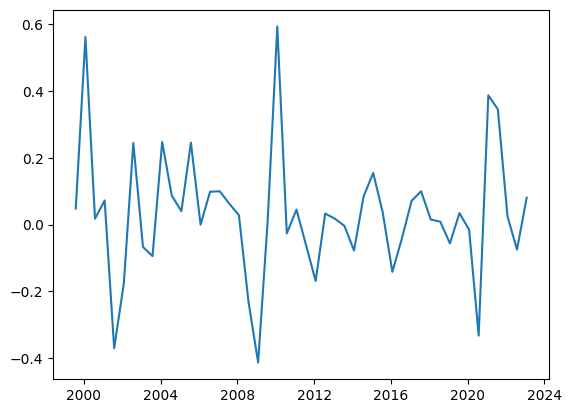

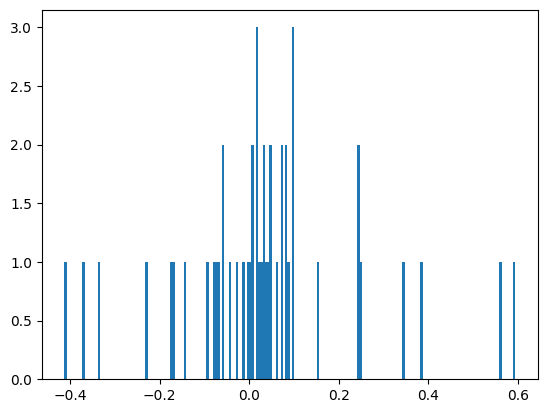

In [7]:
analysis(df,'P/B','6M')